# TSF GRIP Tasks at The Sparks Foundation
## DATA SCIENCE & BUSINESS ANALYTICS
## Name: Madlani Keval Suresh
### Task 2: Prediction using Unsupervised ML
Task Description: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
data = pd.read_csv('/content/drive/MyDrive/Sparks Foundation Internship datasets/Iris .csv')

In [31]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
data.shape

(150, 6)

In [36]:
data.drop(['Species', 'Id'], axis=1, inplace=True)

In [37]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

Clustering Visualization


In [39]:
from sklearn.cluster import KMeans
no_of_clusters = range(2,10)
inertia = []

In [40]:
for i in no_of_clusters:
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  labels = kmeans.predict(X)
  inertia.append(kmeans.inertia_)

Elbow Curve

In [41]:
len(no_of_clusters)

8

In [42]:
len(inertia)

8

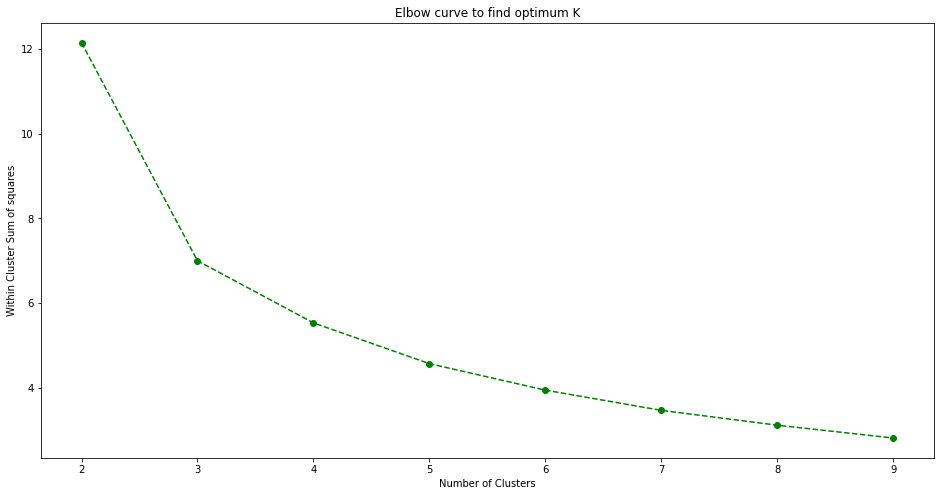

In [43]:
plt.figure(figsize=(16, 8))
plt.plot(no_of_clusters, inertia, 'go--')
plt.title('Elbow curve to find optimum K')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.show()

In [44]:
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

In [45]:
labels = model.predict(X)
model.inertia_

6.998114004826761

In [46]:
model.cluster_centers_

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

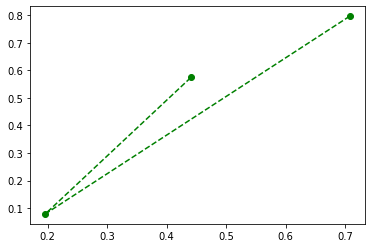

In [47]:
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'go--');

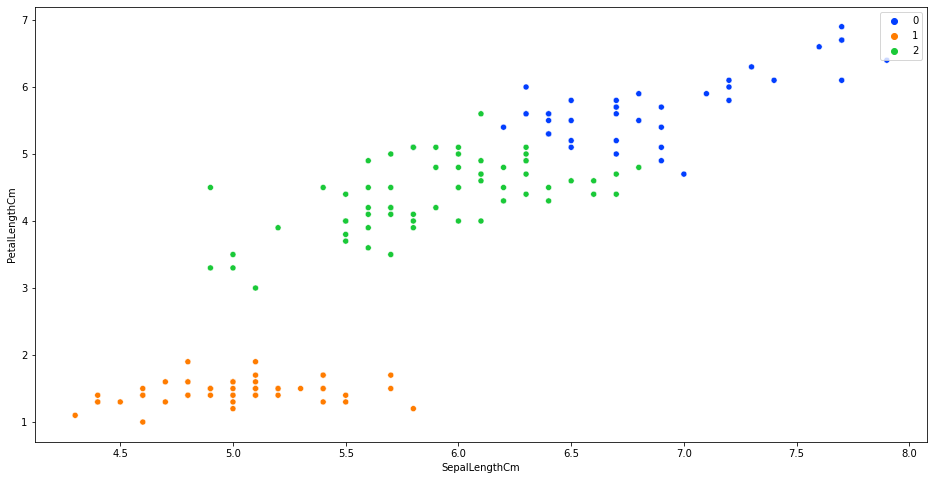

In [48]:
plt.figure(figsize=(16,8))
sns.set_palette("pastel")
sns.scatterplot(x=data['SepalLengthCm'], y = data['PetalLengthCm'], hue=labels, palette='bright')
plt.show()

Optimum number of clusters found is 3.